In [45]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

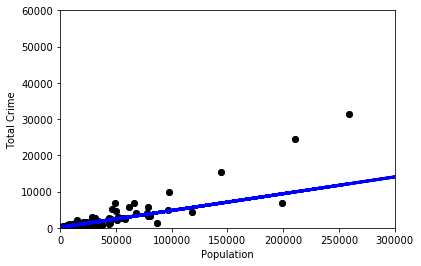

Coefficients: 
 [ 0.0464106]
Intercept: 
 131.237502


In [73]:
df = pd.read_excel('/Users/cappsjr/Downloads/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')
df.columns = ('City', 'Population', 'Violent Crime', 'Murder and nonnegligent manslaughter',
                     'Rape (revised definition)', 'Rape (Legacy definition)', 'Robbery', 'Aggravated assault',
                     'Property crime', 'Burglary', 'Larceny-theft', 'Motor vehicle theft', 'Arson3')

df1 = df.drop([0, 1, 2, 3, 352, 353, 354]).fillna(0)

df1['Total Crime'] = df1['Violent Crime'] + df1['Murder and nonnegligent manslaughter'] + df1['Rape (revised definition)'] + df1['Rape (Legacy definition)'] + df1['Robbery'] + df1['Aggravated assault'] + df1['Property crime'] + df1['Burglary'] + df1['Larceny-theft'] + df1['Motor vehicle theft'] + df1['Arson3']

x = df1['Population'].values.reshape(-1, 1)
y = df1['Total Crime']

#Instantiate our model
regr = linear_model.LinearRegression()

#Fit our model to our data
regr.fit(x, y)


plt.scatter(x, y)
plt.xlim(0, 0.03*1e7)
plt.ylim(0, 60000)
plt.xlabel('Population')
plt.ylabel('Total Crime')

#Plot outputs

plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

#Display the attributes we calculated
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

In [80]:
df1['Population2'] = df1['Population']**2
df1['Murder'] = np.where(df1['Murder and nonnegligent manslaughter'] > 0, 1, 0)
df1['Robbery1'] = np.where(df1['Robbery'] > 0, 1, 0)

In [81]:
df1.head()

,City,Population,Violent Crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (Legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3,Total Crime,Population2,Murder,Robbery1
4,Adams Village,1861,0,0,0,0,0,0,12,2,10,0,0,24,3463321,0,0
5,Addison Town and Village,2577,3,0,0,0,0,3,24,3,20,1,0,54,6640929,0,0
6,Akron Village,2846,3,0,0,0,0,3,16,1,15,0,0,38,8099716,0,0
7,Albany,97956,791,8,0,30,227,526,4090,705,3243,142,0,9762,9595377936,1,1
8,Albion Village,6388,23,0,0,3,4,16,223,53,165,5,0,492,40806544,0,1


In [84]:
X = df1[['Population', 'Population2', 'Murder', 'Robbery1']]
Y = df1['Property crime']

#Instantiate our model
regr = linear_model.LinearRegression()

#Fit our model to our data
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
# inspect the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercepts: \n', regr.intercept_)


Coefficients: 
 [  3.46570268e-02  -2.11108019e-09   1.51866535e+01  -9.62774363e+01]

Intercepts: 
 -109.575335623
